In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

import nltk 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import gensim.corpora as corpora
import gensim.downloader as api
import gensim
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from wordcloud import WordCloud

from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv('clean_data.csv', index_col=0)

In [3]:
data.head(10)

,text,label
0,need add water drug vaccine ready administered...,0
1,hydroxychloroquine shown effective rate treati...,0
2,fact hydroxychloroquine shown effective rate t...,0
3,man made created wuhan laboratory ask billgate...,0
4,billgates finance research wuhan lab created g...,0
5,urgent health bulletin public ministry health ...,0
6,pls tell ur family relative friendsmoh health ...,0
7,serious excellent advice japanese doctor treat...,0
8,stay aware latest information outbreak availab...,1
9,new may show sign infection many day know infe...,0


In [4]:
true_sta = data[data['label']==1]
fake_sta = data[data['label']==0]

In [5]:
true_sta

,text,label
8,stay aware latest information outbreak availab...,1
13,catch matter sunny hot weather country hot wea...,1
14,common symptom dry cough tiredness fever may d...,1
15,frequent excessive alcohol consumption increas...,1
16,evidence far transmitted area including area h...,1
...,...,...
1146,study suggests ultraviolet ray could slow thou...,1
1147,last week medical journal reported business tr...,1
1148,new report sent white house science adviser sa...,1
1149,would ultimate weapon best route back normal l...,1


In [6]:
tokenizer=RegexpTokenizer(r'[a-zA-Z]+')

In [7]:
def word_tokenizer(data, col):
    token=[]
    for item in data[col]:
        token.extend(tokenizer.tokenize(item))
    return token

In [8]:
ttw_true=word_tokenizer(true_sta,'text')
ttw_fake=word_tokenizer(fake_sta,'text')

In [9]:
print(len(set(ttw_true)))
print(len(set(ttw_fake)))

11302
14846


In [10]:
from nltk.probability import FreqDist

In [11]:
freq_true=FreqDist(ttw_true)
freq_fake=FreqDist(ttw_fake)

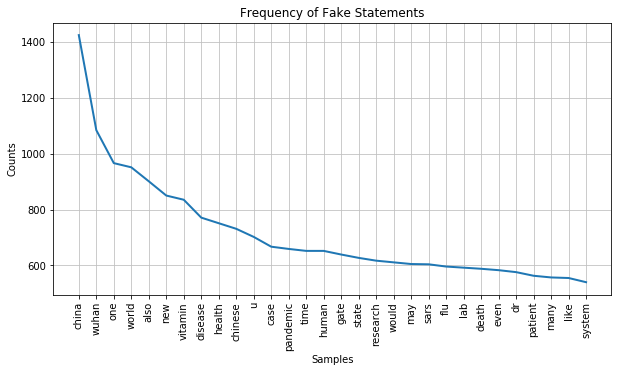

In [12]:
plt.figure(figsize=(10,5))
freq_fake.plot(30, title='Frequency of Fake Statements')
plt.show()

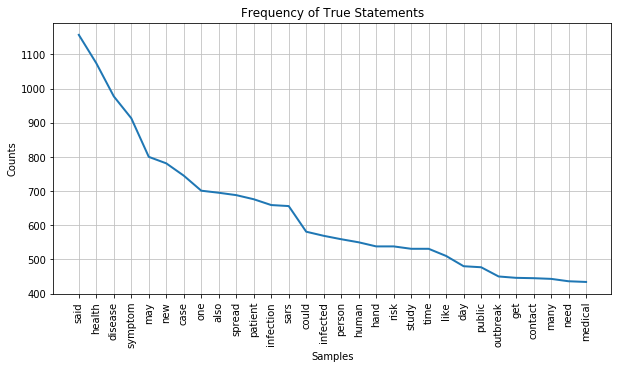

In [13]:
plt.figure(figsize=(10,5))
freq_true.plot(30, title='Frequency of True Statements')
plt.show()

In [14]:
dict(freq_true.most_common(10))

{'said': 1157,
 'health': 1074,
 'disease': 977,
 'symptom': 913,
 'may': 800,
 'new': 781,
 'case': 745,
 'one': 701,
 'also': 695,
 'spread': 688}

In [15]:
dict(freq_fake.most_common(10))

{'china': 1424,
 'wuhan': 1084,
 'one': 966,
 'world': 951,
 'also': 901,
 'new': 850,
 'vitamin': 835,
 'disease': 771,
 'health': 751,
 'chinese': 731}

In [16]:
# Getting our data into a dictionary
true_dict = dict(freq_true.most_common(30))
fake_dict = dict(freq_fake.most_common(30))

In [17]:
def word_cloud(dictionary):
    # Create the word cloud:

    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(dictionary)

# Display the generated image w/ matplotlib:

    plt.figure(figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    
# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

    plt.show()

In [18]:
word_dicts=[true_dict, fake_dict]

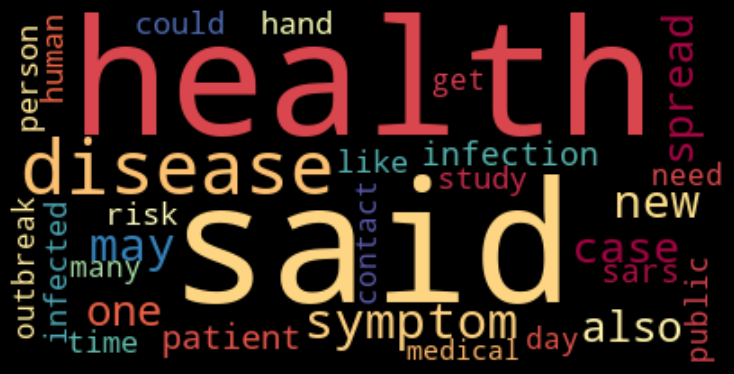

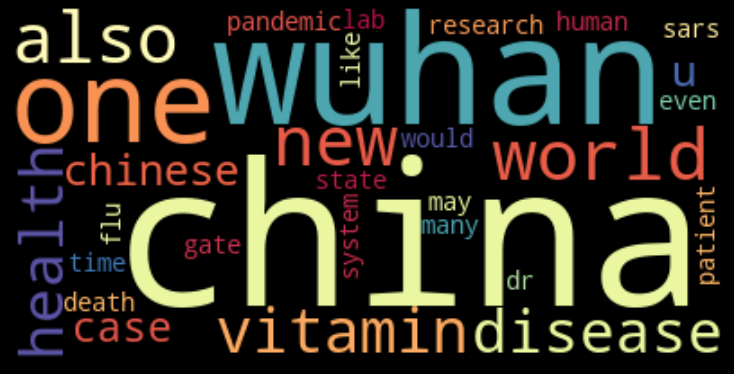

In [19]:
for dictionary in word_dicts:
    word_cloud(dictionary)

# Feature Engineering

In [20]:
X=data.text
y=data.label

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state=10)

TF-IDF

In [22]:
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf

<863x16548 sparse matrix of type '<class 'numpy.float64'>'
	with 170788 stored elements in Compressed Sparse Row format>

In [23]:
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf.get_feature_names())
X_train_tfidf_df.head(10)

,aaa,aaps,aarhus,aaron,ab,abandon,abandoned,abandoning,abate,abated,...,zorlesco,zoster,zte,zucker,zuckerberg,zurich,zvezda,zxc,zy,zygmunt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Word Embedding

In [24]:
import spacy
nlp = spacy.load('en_core_web_md')

In [25]:
#this code solve progress apply
from tqdm.notebook import tqdm
tqdm.pandas()

In [26]:
X_train['spacy']=X_train.progress_apply(lambda x: nlp(x))

In [27]:
X_test['spacy']=X_test.progress_apply(lambda x: nlp(x))

In [28]:
X_train_spacy = pd.DataFrame(np.vstack([x.vector for x in X_train.spacy]))
X_test_spacy = pd.DataFrame(np.vstack([x.vector for x in X_test.spacy]))

In [29]:
X_train_spacy

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.094880,0.163937,-0.014417,0.010096,0.059084,-0.163265,-0.017489,-0.046510,0.001764,2.086751,...,-0.031174,0.042159,0.042008,-0.043616,0.068475,-0.092508,0.012750,-0.044759,-0.027811,0.074417
1,-0.190462,0.103800,-0.015009,0.026899,-0.053383,-0.018410,-0.038078,-0.041722,-0.003194,2.127459,...,-0.128352,0.103230,-0.028923,-0.008042,0.090362,0.029796,-0.031791,-0.025031,0.001430,0.097657
2,-0.214165,0.257270,-0.169828,0.030776,-0.157108,-0.266242,0.041521,-0.147164,0.171471,2.389344,...,-0.122812,0.079769,-0.154380,-0.125365,0.009628,-0.016459,-0.102677,-0.244145,0.033255,-0.044172
3,-0.064857,0.120575,-0.055846,0.026057,0.037077,-0.024933,-0.034939,-0.068518,0.003943,2.032029,...,-0.167563,0.088513,-0.005229,-0.011855,0.076369,-0.017028,-0.033594,0.017871,0.007754,0.101330
4,-0.230177,0.115854,-0.034296,0.030791,0.064738,0.098583,0.039200,-0.217045,0.098412,1.614837,...,0.040139,0.115015,-0.003235,0.069527,0.177887,-0.123412,-0.021610,-0.018561,-0.123875,0.188477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,-0.147863,-0.023161,-0.048194,-0.055225,0.215855,0.146663,-0.040689,-0.156334,0.011866,1.786535,...,0.022760,0.156586,0.101623,0.079050,0.061577,-0.077930,-0.041942,0.055318,-0.135945,0.248379
859,-0.155478,0.094827,-0.158212,-0.038293,-0.074495,0.058469,-0.026370,0.027428,0.005891,1.954268,...,-0.083429,0.083728,-0.070707,-0.023770,0.024448,0.032456,-0.066962,-0.062665,-0.010715,0.064015
860,-0.154937,0.174748,-0.069689,-0.002084,-0.035381,-0.076072,-0.032862,-0.096527,-0.003606,2.177969,...,-0.053431,0.116817,0.010523,-0.014131,0.054135,-0.070464,-0.070415,-0.043998,0.011826,0.101872
861,-0.079259,0.125915,-0.146061,0.107897,0.031974,-0.031957,-0.013979,-0.082050,0.015677,2.433291,...,-0.190167,0.028688,-0.105143,-0.087169,0.091417,-0.110465,-0.049109,-0.087925,0.065768,0.066092


In [30]:
#Define a function to iterate models
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_tr_pred=model.predict(x_train)
    y_pred=model.predict(x_test)
    metrics_train=classification_report(y_train, y_tr_pred)
    metrics_test=classification_report(y_test, y_pred)
    fig1, ax1=plt.subplots(figsize=[7,7])
    plot_train=plot_confusion_matrix(model,x_train, y_train, ax=ax1)
    plt.show()
    
    print('\n')
    print('The Metrics train set')
    print(metrics_train)
    fig2, ax2= plt.subplots(figsize=[7,7])
    plot_test=plot_confusion_matrix(model,x_test, y_test, ax=ax2)
    plt.show()
    print('\n')
    print('The Metrics test set')
    print(metrics_test)

In [31]:
nb=GaussianNB()

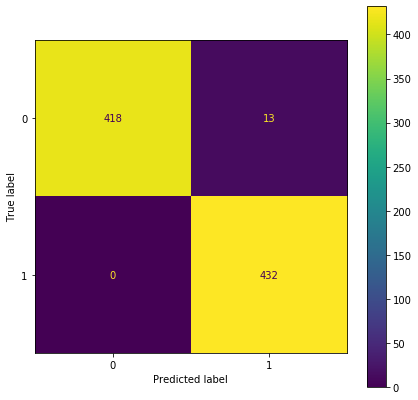



The Metrics train set
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       431
           1       0.97      1.00      0.99       432

    accuracy                           0.98       863
   macro avg       0.99      0.98      0.98       863
weighted avg       0.99      0.98      0.98       863



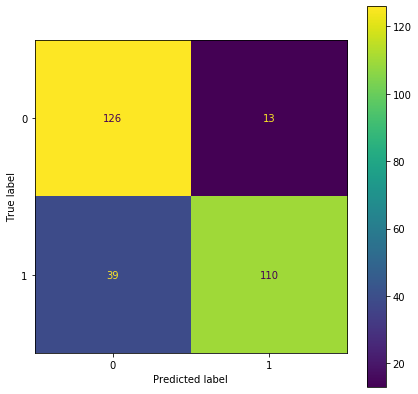



The Metrics test set
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       139
           1       0.89      0.74      0.81       149

    accuracy                           0.82       288
   macro avg       0.83      0.82      0.82       288
weighted avg       0.83      0.82      0.82       288



In [32]:
vec_nb=run_model(nb,X_train_tfidf.toarray(), X_test_tfidf.toarray(), y_train, y_test )